# Немного о том, что тут происходит

Это мой ноутбук, посвященный реализации **алгоритма линейной регрессии**, использующего в качестве основы (для поиска минимума функции потерь) метод **стохастического градиентного спуска**. Линейная регрессия реализована в виде класса. Для того, чтобы тренировать модель исходя из входных данных, необходимо сначала создать объект класса **Linear_regression**, передав необходимые для обучения модели параметры, после чего тренировать модель, используя метод **fit()** класса Linear_regression. Далее, уже с помощью функции **predict()**, можно предсказать значение таргета при даных значениях выборки.

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Класс "Линейная регрессия"

In [2]:
class Linear_regression():
    def __init__(self, learning_rate, iterations_quant, reg_coefficient = 0):
        self.learning_rate = learning_rate
        self.iterations_quant = iterations_quant
        self.reg_coefficient = reg_coefficient
    
    def fit(self, X, Y):
        self.df_rows_quant, self.df_columns_quant = X.shape

        self.w = np.random.rand(self.df_columns_quant)
        self.bias = 0

        self.X = X
        self.Y = Y

        for i in range(self.iterations_quant):
            some_predict = self.predict(self.X)
            
            transposed_X = np.transpose(self.X)
            err = some_predict - self.Y

            d_w = 2 * np.dot(transposed_X, err) / self.df_rows_quant
            d_bias = 2 * np.sum(some_predict - self.Y) / self.df_rows_quant

            self.w -= self.learning_rate * (d_w + 2 * self.reg_coefficient * d_w)
            self.bias -= self.learning_rate * (d_bias + 2 * self.reg_coefficient + d_bias)

    def predict(self, X):
        return np.dot(X, self.w) + self.bias

# Инициализируем входные данные

## Для начала, импортируем датасет

In [3]:
df = pd.read_csv("sample_data/some_function_values.csv")
df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-2.000000,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,-0.270671
1,-1.988848,3.955515,-7.866916,15.646097,-31.117701,61.888365,-123.086526,-0.272180
2,-1.977695,3.911278,-7.735316,15.298097,-30.254972,59.835113,-118.335613,-0.273689
3,-1.966543,3.867290,-7.605192,14.955935,-29.411485,57.838944,-113.742755,-0.275198
4,-1.955390,3.823551,-7.476535,14.619545,-28.586917,55.898581,-109.303545,-0.276706
...,...,...,...,...,...,...,...,...
265,0.955390,0.912771,0.872052,0.833150,0.795984,0.760475,0.726551,2.483714
266,0.966543,0.934205,0.902949,0.872739,0.843539,0.815317,0.788039,2.540886
267,0.977695,0.955888,0.934567,0.913722,0.893341,0.873415,0.853934,2.599029
268,0.988848,0.977820,0.966914,0.956131,0.945468,0.934924,0.924497,2.658156


## Теперь разделим его на список объектов и список соответствующих им таргетов

In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

## Сделаем разделение списка объектов и таргетов на тренировочные и тестовые

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 42)

# Создаем модель линейной регрессии и тренируем ее на нашем датасете

In [6]:
model = Linear_regression(0.0001, 200000)
model.fit(X_train, Y_train)

# Используя тестовую выборку, сделаем нужные предсказания

In [7]:
Y_test_pred = model.predict(X_test)

# Выведем данные, которые нам удалось найти (Вектор w и сдвиг bias)

In [8]:
w_list = list(model.w)

print("bias after training:", model.bias, "\n")

for i, w_i in enumerate(w_list):
    print("w_{} =".format(i + 1), w_list[i])

bias after training: 0.07463131877645303 

w_1 = 0.9174431362120846
w_2 = 0.45603438626114695
w_3 = 0.08271990908708797
w_4 = 0.4358744400988263
w_5 = 0.6720764899579537
w_6 = 0.39808191432649565
w_7 = 0.08334551685708039


# Теперь выведем график, на котором будут отражены объекты тестовой выборки и предсказания модели

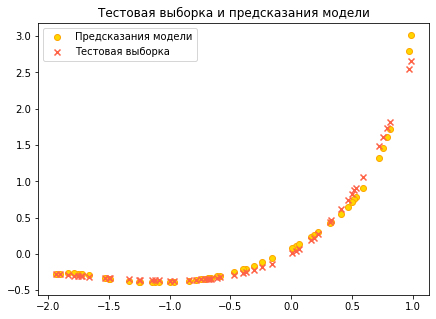

In [9]:
graph_X_values = X_test[:, 0]
graph_Y_test_values = Y_test
grapg_Y_pred_values = Y_test_pred

figure, ax = plt.subplots()

figure.set_figwidth(7)
figure.set_figheight(5)

ax.set_title('Тестовая выборка и предсказания модели')

ax.scatter(graph_X_values, grapg_Y_pred_values, color = "gold",
           edgecolors='orange', label = "Предсказания модели")
ax.scatter(graph_X_values, graph_Y_test_values, color = "tomato",
           label = "Тестовая выборка", marker = "x")

ax.legend()

plt.show()

# В дополнение к графику можно вывести две таблицы

## Таблица с истиными значениями таргетов для соответствующих объектов

In [10]:
test_df = pd.DataFrame(np.concatenate((X_test, Y_test[:, np.newaxis]), axis = 1),
             columns = ["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"])
test_df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-1.665428,2.773649,-4.619311e+00,7.693128e+00,-1.281235e+01,2.133803e+01,-3.553695e+01,-0.314949
1,-0.706320,0.498888,-3.523741e-01,2.488888e-01,-1.757950e-01,1.241675e-01,-8.770195e-02,-0.348538
2,-1.118959,1.252069,-1.401015e+00,1.567678e+00,-1.754168e+00,1.962842e+00,-2.196340e+00,-0.365474
3,-0.583643,0.340639,-1.988118e-01,1.160351e-01,-6.772311e-02,3.952612e-02,-2.306915e-02,-0.325592
4,0.185874,0.034549,6.421747e-03,1.193633e-03,2.218649e-04,4.123883e-05,7.665210e-06,0.223842
5,-0.472119,0.222896,-1.052336e-01,4.968277e-02,-2.345618e-02,1.107411e-02,-5.228295e-03,-0.294451
6,0.330855,0.109465,3.621706e-02,1.198260e-02,3.964502e-03,1.311675e-03,4.339744e-04,0.460602
7,-1.498141,2.244427,-3.362469e+00,5.037454e+00,-7.546817e+00,1.130620e+01,-1.693828e+01,-0.334902
8,-0.237918,0.056605,-1.346738e-02,3.204135e-03,-7.623220e-04,1.813703e-04,-4.315130e-05,-0.187543
9,0.754647,0.569492,4.297652e-01,3.243210e-01,2.447478e-01,1.846982e-01,1.393819e-01,1.605028


## Таблица с предсказанными значениями таргетов для соответствующих объектов

In [11]:
pred_df = pd.DataFrame(np.concatenate((X_test, Y_test_pred[:, np.newaxis]), axis = 1),
             columns = ["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"])
pred_df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-1.665428,2.773649,-4.619311e+00,7.693128e+00,-1.281235e+01,2.133803e+01,-3.553695e+01,-0.295732
1,-0.706320,0.498888,-3.523741e-01,2.488888e-01,-1.757950e-01,1.241675e-01,-8.770195e-02,-0.342560
2,-1.118959,1.252069,-1.401015e+00,1.567678e+00,-1.754168e+00,1.962842e+00,-2.196340e+00,-0.394162
3,-0.583643,0.340639,-1.988118e-01,1.160351e-01,-6.772311e-02,3.952612e-02,-2.306915e-02,-0.303057
4,0.185874,0.034549,6.421747e-03,1.193633e-03,2.218649e-04,4.123883e-05,7.665210e-06,0.262133
5,-0.472119,0.222896,-1.052336e-01,4.968277e-02,-2.345618e-02,1.107411e-02,-5.228295e-03,-0.255704
6,0.330855,0.109465,3.621706e-02,1.198260e-02,3.964502e-03,1.311675e-03,4.339744e-04,0.439533
7,-1.498141,2.244427,-3.362469e+00,5.037454e+00,-7.546817e+00,1.130620e+01,-1.693828e+01,-0.341713
8,-0.237918,0.056605,-1.346738e-02,3.204135e-03,-7.623220e-04,1.813703e-04,-4.315130e-05,-0.117992
9,0.754647,0.569492,4.297652e-01,3.243210e-01,2.447478e-01,1.846982e-01,1.393819e-01,1.453229
